<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>


---

## Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc
import scipy.stats as sps

from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
-- библиотека для работы массивами данных
2. Зачем используется и почему работает быстрее?
-- для работы с массивами данных в представлении векторов, матриц, тензоров. Многие функции и методы написаны на C, кроме того использует векторные операции.
3. Что такое линейная алгебра?
-- раздел общей алгебры изучающий кольца, группы, поля, линейные/афинные пространства, их элементы и алгебраические операции над ними
4. Как она связана с машинным обучением и глубоким обучением?
-- численные решения задач оптимизации (как часть алгоритма машинного обучения) используют матричные вычисления (не всегда в строгом смысле, особенно когда речь идёт о разреженных матрицах)

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
# ========
print(a.ndim)
print(b.shape)

2
(10, 10)


In [3]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат
    new_columns = []
    for row in a:
        new_row = []
        for column in b.T:
            x=0
            for i in range(len(row)):
                x+=row[i]*column[i]
            new_row.append(x)
        new_columns.append(new_row)
    return np.array(new_columns)

In [4]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return np.dot(a,b)

In [5]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 989 µs


array([[2.15605209, 2.77537396, 1.96649919, 2.03016356, 3.59651715,
        2.03545471, 1.63313733, 2.45185354, 2.20769493, 2.05686302],
       [2.68949156, 2.56135887, 2.02223499, 1.71784412, 3.31267238,
        2.49508569, 1.97773829, 2.95547794, 2.16879488, 1.78393203],
       [3.667407  , 2.48081647, 2.09821173, 3.30987239, 4.46014259,
        4.01728719, 2.70154394, 3.70249535, 2.5272298 , 2.40601126],
       [2.54228144, 2.64675219, 1.79446298, 1.79059147, 2.95992227,
        2.59694237, 2.49737019, 2.9620975 , 2.19058297, 2.23598976],
       [2.95637793, 2.14138647, 1.95773777, 2.3466901 , 3.96761831,
        3.07458685, 2.40000774, 3.0646312 , 2.37300792, 2.4137364 ],
       [3.29300137, 3.23384564, 2.4506406 , 3.02888063, 4.40992444,
        3.59473806, 2.62650717, 3.79679025, 3.10204712, 2.07121024],
       [2.4565135 , 2.90099852, 1.67729399, 2.62238827, 3.47742867,
        3.14844283, 2.3224185 , 3.17135025, 2.37946687, 1.65985816],
       [3.07282907, 3.34960413, 1.9961872

In [6]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 0 ns


array([[2.15605209, 2.77537396, 1.96649919, 2.03016356, 3.59651715,
        2.03545471, 1.63313733, 2.45185354, 2.20769493, 2.05686302],
       [2.68949156, 2.56135887, 2.02223499, 1.71784412, 3.31267238,
        2.49508569, 1.97773829, 2.95547794, 2.16879488, 1.78393203],
       [3.667407  , 2.48081647, 2.09821173, 3.30987239, 4.46014259,
        4.01728719, 2.70154394, 3.70249535, 2.5272298 , 2.40601126],
       [2.54228144, 2.64675219, 1.79446298, 1.79059147, 2.95992227,
        2.59694237, 2.49737019, 2.9620975 , 2.19058297, 2.23598976],
       [2.95637793, 2.14138647, 1.95773777, 2.3466901 , 3.96761831,
        3.07458685, 2.40000774, 3.0646312 , 2.37300792, 2.4137364 ],
       [3.29300137, 3.23384564, 2.4506406 , 3.02888063, 4.40992444,
        3.59473806, 2.62650717, 3.79679025, 3.10204712, 2.07121024],
       [2.4565135 , 2.90099852, 1.67729399, 2.62238827, 3.47742867,
        3.14844283, 2.3224185 , 3.17135025, 2.37946687, 1.65985816],
       [3.07282907, 3.34960413, 1.9961872

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [7]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    return A.cumsum()/np.arange(1,len(A)+1)

In [8]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        # Ваш код здесь
        S[i] = A[:(i+1)].sum()/(i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 4) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 64.9 ms


4.362454841810859e-12

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [9]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    Y = X.copy()
    Y[np.arange(0,len(X),2)] = (Y[np.arange(0,len(X),2)])[::-1]
    Y[np.arange(1,len(X),2)] = a
    Y = np.concatenate([Y,X],axis=0)
    return Y[::-1]

In [10]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Y = [x for x in X]
    if len(X) % 2 == 0:
        l = len(X) - 2
    else:
        l = len(X) - 1
    for idx, x in enumerate(X):
        if idx % 2 == 0:
            Y[l - idx] = x
        else:
            Y[idx] = a
    Y = Y+X.tolist()
    return Y[::-1]

In [11]:
X = sps.uniform.rvs(size=10**7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 216 ms
Wall time: 2.84 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:** Быстрые вычисления. Написаны на C, вычисления векторные.

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [12]:
a = np.random.sample(3)
b = np.random.sample(3)

In [16]:
def stupid_scalar_product(a,b):
    return sum([x*y for x,y in zip(a,b)])
        

In [17]:
def numpy_scalar_product(a,b):
    return a @ b

In [18]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 0 ns
Wall time: 0 ns


0.0

### Задание 5*

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ `np.dot` и вообще БЕЗ какой-либо вспомогательной функции из `numpy`, то есть пользуясь только индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). Рекомендуем гуглить по запросу "NumPy broadcasting"

In [46]:
def cool_matrix_product(A, B):
    return (A[np.newaxis,:].T*B[:,np.newaxis]).sum(axis=0)

In [54]:
# тут проверьте, что всё правильно перемножается
a = np.random.sample((3,5))
b = np.random.sample((5,10))
np.abs(cool_matrix_product(a,b) - np.dot(a,b)).sum()

1.3877787807814457e-15

Ваш код не будет проверяться нами непосредственно, однако это очень и очень полезное упражнение.

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [55]:
pic = misc.face()  # встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [57]:
print(pic.dtype, pic.shape)

uint8 (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:** 3 цветовых канала для каждого пикселя?

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

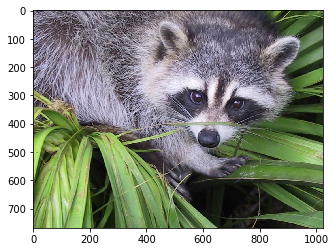

In [59]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [71]:
print(pic[:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [79]:
print(pic.max(),pic.min(),pic.mean(),pic.min(axis=2).min(),pic.max(axis=2).max())

255 0 110.16274388631184 0 255


### Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [80]:
pic = misc.face(gray=True)

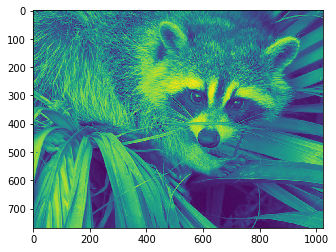

In [81]:
plt.imshow(pic)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [82]:
print(pic.shape)
h,w=pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

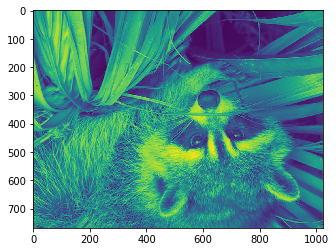

In [86]:
#тут ваш код
plt.imshow(pic[::-1])

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [87]:
#тут ваш код
pic = pic+50

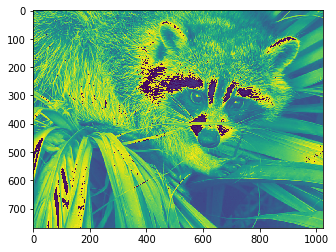

In [88]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [92]:
new_pic = np.zeros((h,w,3))

In [95]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i,j,:] = int(pic[i][j]/200)

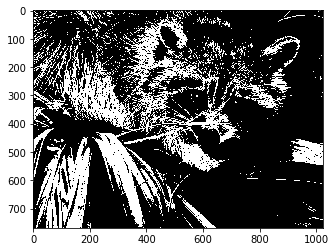

In [96]:
plt.imshow(new_pic)

### Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [97]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

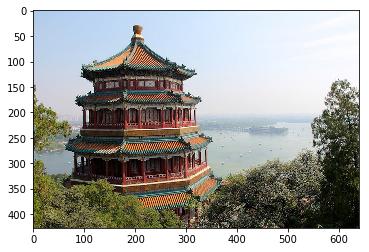

In [98]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [99]:
h, w, c = china.shape

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

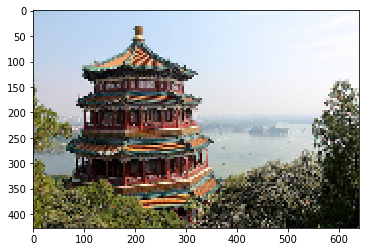

In [100]:
from copy import copy
compressed_pic = copy(china)
#тут ваш код
for i in range(0,h,4):
    for j in range(0,w,4):
        compressed_pic[i:(i+4),j:(j+4),:] = compressed_pic[i,j]
        
plt.imshow(compressed_pic)

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [101]:
import scipy

In [125]:
def calculate_mismatch(a,b):
    mismatch=0
    mismatch = (a != b).sum()/np.prod(a.shape)
    print(mismatch)

In [126]:
calculate_mismatch(china,compressed_pic)

0.7792996194379391


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [127]:
#тут ваш код
china_sin = np.sin(china).astype('float32')
china_sin.shape

(427, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


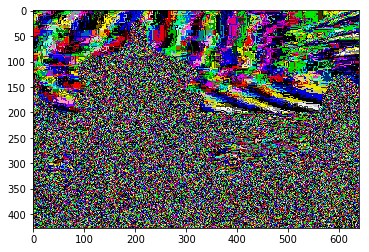

In [128]:
plt.imshow(china_sin) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [37]:
import librosa #импортируем библиотеку
import IPython.display

In [38]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [39]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [40]:
print(audio.dtype, len(audio)/sr, audio.mean())

float32 33.529659863945575 -7.933527e-06


    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [41]:
from matplotlib import pyplot as plt

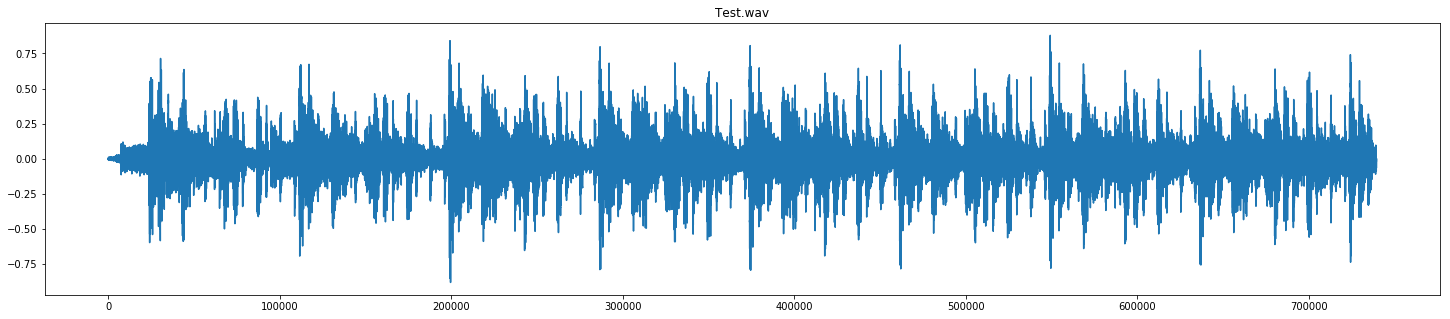

In [42]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
g = plt.plot(audio)
plt.show()

Обрежьте последние 4 секунды файла

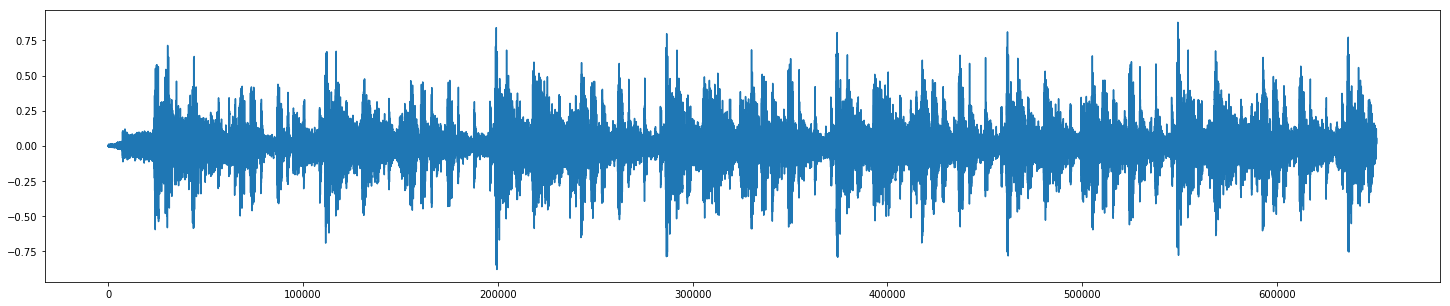

In [43]:
audio = audio[:-4*sr]
plt.figure(figsize=(25,5))
g = plt.plot(audio)
plt.show()

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [44]:
IPython.display.Audio(audio, rate=sr)

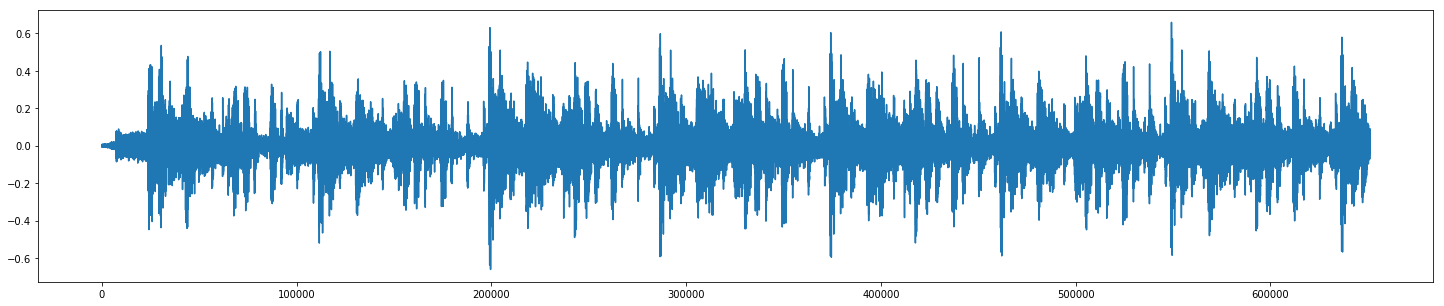

In [47]:
audio2 = audio*0.75
plt.figure(figsize=(25,5))
g = plt.plot(audio2)
plt.show()

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [48]:
IPython.display.Audio(audio2, rate=sr*2)